/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.


2020-11-01

---CHANGES---

No major changes.


---SUMMARY---
total metadata rows: 332458
CORD UIDs (new: 1938, removed: 409)

Full text:
  PDF - 123513 json (new: 549, removed: 3136)
  PMC - 91446 json (new: 2)

---------------------------
2020-10-31

---CHANGES---

No major changes.


---SUMMARY---
total metadata rows: 330801
CORD UIDs (new: 8221, removed: 71)

Full text:
  PDF - 126099 json (new: 1005, removed: 557)
  PMC - 91444 json (new: 474)

---------------------------


2020-10-29

---CHANGES---

No major changes.


---SUMMARY---
total metadata rows: 322441
CORD UIDs (new: 4697, removed: 1314)

Full text:
  PDF - 125651 json (new: 3179, removed: 209)
  PMC - 90970 json (new: 305, removed: 1)

---------------------------
2020-10-28

---CHANGES---

No major changes.


---SUMMARY---
total metadata rows: 320518
CORD UIDs (new: 1290, removed: 409)

Full text:
  PDF - 122679 json (new: 1311, removed: 616)
  PMC - 90666 json (new: 512, removed: 1)

---------------------------
2020-10-

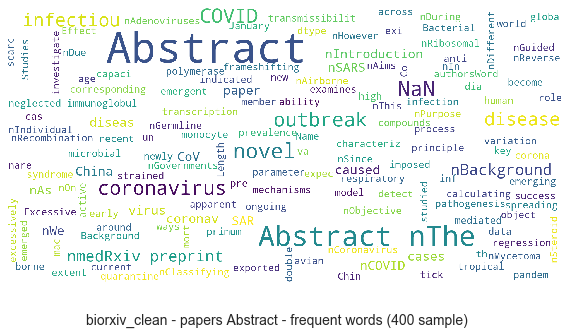

In [10]:


# %%


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim



import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from PIL import PILLOW_VERSION
from nltk.stem import WordNetLemmatizer
import spacy
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()


from bert import tokenization


import numpy as np



# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
n = 1000


# Any results you write to the current directory are saved as output.


import bert

import itertools

from nltk.stem import WordNetLemmatizer


import nltk
### To install nltk take out comments from next few lines

#import ssl

#try:
#   _create_unverified_https_context = ssl._create_unverified_context
#except AttributeError:
#   pass
#else:
#   ssl._create_default_https_context = _create_unverified_https_context

#nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['background', 'methods', 'introduction', 'conclusions', 'results',
                   'purpose', 'materials', 'discussions','methodology','result analysis'])
# %% Reading Directory

# os.listdir('../Users/raghavkhandelwal/PycharmProjects/Stanford/CORD19_CS_221/CORD-19/')
os.listdir(os.path.expanduser('~/Downloads/CORD19/'))

with open(os.path.expanduser('~/Downloads/CORD19/metadata.readme')) as f:
    data = f.read()
    print(data)


biorxiv_dir = os.listdir(os.path.expanduser('~/Downloads/CORD19/biorxiv_medrxiv/'))
print("Number of articles retrieved from biorxiv:", len(biorxiv_dir))


biorxiv_clean = pd.read_csv(os.path.expanduser('~/Downloads/CORD19/biorxiv_clean.csv'))
clean_comm_use = pd.read_csv(os.path.expanduser('~/Downloads/CORD19/clean_comm_use.csv'))
clean_noncomm_use =  pd.read_csv(os.path.expanduser('~/Downloads/CORD19/clean_noncomm_use.csv'))
clean_pmc =  pd.read_csv(os.path.expanduser('~/Downloads/CORD19/clean_pmc.csv'))

biorxiv_clean.head(2)
clean_comm_use.head(2)
clean_noncomm_use.head(2)
clean_pmc.head(2)
biorxiv_clean.text[0]




from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

stopwords = set(STOPWORDS)
#https://www.kaggle.com/gpreda/cord-19-solution-toolbox

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(biorxiv_clean['abstract'], title = 'biorxiv_clean - papers Abstract - frequent words (400 sample)')

df = biorxiv_clean
df = df.abstract.dropna()
data = df.values.tolist()

# *I have downloaded simsentence.csv from version 1's output of this kernel and now using that csv file in cell below for little analysis *
simsentence = pd.read_csv(os.path.expanduser('~/Downloads/CORD19//simsentence.csv'))



def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data))

print(data_words[:1])


# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])


def remove_stopwords(texts):

    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

import spacy
from spacy.lang.en import English
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#or
#spacy.cli.download("en")
nlp = spacy.load('en', disable=['parser', 'ner'])


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[1])

print(data_lemmatized[:1])


# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

# Topic Modeling
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True
                                        )

#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Computing proplexity and coherence score

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [3]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

pyLDAvis.save_html(vis, './lda4topics_v2.html')


optimal_model = lda_model

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

NameError: name 'lda_model' is not defined

In [4]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False,
                               num_words=30)

fig, axes = plt.subplots(5, 1, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=500)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i + 1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 12):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(22, 10))
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 1:
            #i = i+1
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=15, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += 0.009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=20, x = 0.2, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

corp = corpus[0:13]
corp_cur = corp[13-1]
topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
word_dominanttopic

def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)


import bokeh
from bokeh.models import HoverTool
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])


plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              plot_width=800, plot_height=600)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

    # # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    # # Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

    # # Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

from matplotlib.ticker import FuncFormatter

# Plot

fig, ax1  = plt.subplots(1, figsize=(10, 10))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x + 1)+ ':\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 2000)

plt.show()

df_dominant_topic_in_each_doc

fig, ax2  = plt.subplots(1, figsize=(10, 10))
# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

vectorizer = CountVectorizer(analyzer='word', min_df=10,                        # minimum reqd occurences of a word
                              stop_words='english',             # remove stop words
                              lowercase=True,                   # convert all words to lowercase
                              token_pattern='[a-zA-Z0-9]{3,}'  # num chars > 3
                              # max_features=50000,             # max number of uniq words
                             )
data_vectorized = vectorizer.fit_transform(data_lemmatized)

search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation(n_jobs=-1)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)


# Do the Grid Search
model.fit(data_vectorized)


best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

categories = list(df.Dominant_Topic.unique())
categories

NameError: name 'stop_words' is not defined

In [5]:
df1 = clean_comm_use
df1 = df1.dropna()

words = []
for ii in range(0,len(df1)):
    words.append(str(df1.iloc[ii]['text']).split(" "))
    
    
n_gram_all = []

for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)
    
    from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(n_gram_all)

from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

from sklearn.cluster import KMeans

k = 15 
kmeans = KMeans(n_clusters=k, n_jobs=4, verbose= k)
y_pred = kmeans.fit_predict(X_train)

y_pred.shape

y_train = y_pred
y_test = kmeans.predict(X_test)

%%time
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X_train)

from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(10,10)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)

plt.title("t-SNE Covid-19 Articles")
# plt.savefig("plots/t-sne_covid19.png")
plt.show()

X_embedded[:,1].shape

# sns settings
sns.set(rc={'figure.figsize':(10,10)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

type(clean_noncomm_use.abstract.dropna().tolist())

from gensim.summarization.summarizer import summarize
summarize(clean_noncomm_use.abstract.dropna().to_string())






NameError: name 'clean_comm_use' is not defined

In [6]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
import re

from nltk.tokenize import sent_tokenize
sentences = []
for s in clean_noncomm_use.abstract.dropna():
    sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x] # flatten list

sentences[:3]

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

len(word_embeddings)

# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)
    
    # similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

import torch
torch.cuda.is_available()

%%time
from sklearn.metrics.pairwise import cosine_similarity
for i in range(1000):
    for j in range(1000):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]
            #print(sim_mat[i][j])
            
            
            %%time
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
for i in range(50):
    print(ranked_sentences[i][1])
    print('\n\n')
    
    

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>


NameError: name 'clean_noncomm_use' is not defined

In [7]:
clean_pmc.title

import os
os.listdir('cased_L-12_H-768_A-12')
BERT_VOCAB = 'cased_L-12_H-768_A-12/vocab.txt'
BERT_INIT_CHKPNT = 'cased_L-12_H-768_A-12/bert_model.ckpt'
BERT_CONFIG = 'cased_L-12_H-768_A-12/bert_config.json'

def generate_ngram(seq, ngram = (1, 3)):
    g = []
    for i in range(ngram[0], ngram[-1] + 1):
        g.extend(list(ngrams_generator(seq, i)))
    return g

def _pad_sequence(
    sequence,
    n,
    pad_left = False,
    pad_right = False,
    left_pad_symbol = None,
    right_pad_symbol = None,
):
    sequence = iter(sequence)
    if pad_left:
        sequence = itertools.chain((left_pad_symbol,) * (n - 1), sequence)
    if pad_right:
        sequence = itertools.chain(sequence, (right_pad_symbol,) * (n - 1))
    return sequence


def ngrams_generator(
    sequence,
    n,
    pad_left = False,
    pad_right = False,
    left_pad_symbol = None,
    right_pad_symbol = None,
):
    """
    generate ngrams.

    Parameters
    ----------
    sequence : list of str
        list of tokenize words.
    n : int
        ngram size

    Returns
    -------
    ngram: list
    """
    sequence = _pad_sequence(
        sequence, n, pad_left, pad_right, left_pad_symbol, right_pad_symbol
    )

    history = []
    while n > 1:
        try:
            next_item = next(sequence)
        except StopIteration:
            return
        history.append(next_item)
        n -= 1
    for item in sequence:
        history.append(item)
        yield tuple(history)
        del history[0]

def merge_wordpiece_tokens(paired_tokens, weighted = True):
    new_paired_tokens = []
    n_tokens = len(paired_tokens)

    i = 0

    while i < n_tokens:
        current_token, current_weight = paired_tokens[i]
        if current_token.startswith('##'):
            previous_token, previous_weight = new_paired_tokens.pop()
            merged_token = previous_token
            merged_weight = [previous_weight]
            while current_token.startswith('##'):
                merged_token = merged_token + current_token.replace('##', '')
                merged_weight.append(current_weight)
                i = i + 1
                current_token, current_weight = paired_tokens[i]
            merged_weight = np.mean(merged_weight)
            new_paired_tokens.append((merged_token, merged_weight))

        else:
            new_paired_tokens.append((current_token, current_weight))
            i = i + 1

    words = [
        i[0]
        for i in new_paired_tokens
        if i[0] not in ['[CLS]', '[SEP]', '[PAD]']
    ]
    weights = [
        i[1]
        for i in new_paired_tokens
        if i[0] not in ['[CLS]', '[SEP]', '[PAD]']
    ]
    if weighted:
        weights = np.array(weights)
        weights = weights / np.sum(weights)
    return list(zip(words, weights))

def _extract_attention_weights(num_layers, tf_graph):
    attns = [
        {
            'layer_%s'
            % i: tf_graph.get_tensor_by_name(
                'bert/encoder/layer_%s/attention/self/Softmax:0' % i
            )
        }
        for i in range(num_layers)
    ]

    return attns


from bert import modeling 

def padding_sequence(seq, maxlen, padding = 'post', pad_int = 0):
    padded_seqs = []
    for s in seq:
        if padding == 'post':
            padded_seqs.append(s + [pad_int] * (maxlen - len(s)))
        if padding == 'pre':
            padded_seqs.append([pad_int] * (maxlen - len(s)) + s)
    return padded_seqs


def bert_tokenization(tokenizer, texts, cls = '[CLS]', sep = '[SEP]'):

    input_ids, input_masks, segment_ids, s_tokens = [], [], [], []
    for text in texts:
        tokens_a = tokenizer.tokenize(text)
        tokens = [cls] + tokens_a + [sep]
        segment_id = [0] * len(tokens)
        input_id = tokenizer.convert_tokens_to_ids(tokens)
        input_mask = [1] * len(input_id)

        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        s_tokens.append(tokens)

    maxlen = max([len(i) for i in input_ids])
    input_ids = padding_sequence(input_ids, maxlen)
    input_masks = padding_sequence(input_masks, maxlen)
    segment_ids = padding_sequence(segment_ids, maxlen)

    return input_ids, input_masks, segment_ids, s_tokens

class _Model:
    def __init__(self, bert_config, tokenizer):
        _graph = tf.Graph()
        with _graph.as_default():
            self.X = tf.placeholder(tf.int32, [None, None])
            self._tokenizer = tokenizer

            self.model = modeling.BertModel(
                config = bert_config,
                is_training = False,
                input_ids = self.X,
                use_one_hot_embeddings = False,
            )
            self.logits = self.model.get_pooled_output()
            self._sess = tf.InteractiveSession()
            self._sess.run(tf.global_variables_initializer())
            var_lists = tf.get_collection(
                tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'bert'
            )
            self._saver = tf.train.Saver(var_list = var_lists)
            attns = _extract_attention_weights(
                bert_config.num_hidden_layers, tf.get_default_graph()
            )
            self.attns = attns

    def vectorize(self, strings):

        """
        Vectorize string inputs using bert attention.

        Parameters
        ----------
        strings : str / list of str

        Returns
        -------
        array: vectorized strings
        """

        if isinstance(strings, list):
            if not isinstance(strings[0], str):
                raise ValueError('input must be a list of strings or a string')
        else:
            if not isinstance(strings, str):
                raise ValueError('input must be a list of strings or a string')
        if isinstance(strings, str):
            strings = [strings]

        batch_x, _, _, _ = bert_tokenization(self._tokenizer, strings)
        return self._sess.run(self.logits, feed_dict = {self.X: batch_x})

    def attention(self, strings, method = 'last', **kwargs):
        """
        Get attention string inputs from bert attention.

        Parameters
        ----------
        strings : str / list of str
        method : str, optional (default='last')
            Attention layer supported. Allowed values:

            * ``'last'`` - attention from last layer.
            * ``'first'`` - attention from first layer.
            * ``'mean'`` - average attentions from all layers.

        Returns
        -------
        array: attention
        """

        if isinstance(strings, list):
            if not isinstance(strings[0], str):
                raise ValueError('input must be a list of strings or a string')
        else:
            if not isinstance(strings, str):
                raise ValueError('input must be a list of strings or a string')
        if isinstance(strings, str):
            strings = [strings]

        method = method.lower()
        if method not in ['last', 'first', 'mean']:
            raise Exception(
                "method not supported, only support 'last', 'first' and 'mean'"
            )

        batch_x, _, _, s_tokens = bert_tokenization(self._tokenizer, strings)
        maxlen = max([len(s) for s in s_tokens])
        s_tokens = padding_sequence(s_tokens, maxlen, pad_int = '[SEP]')
        attentions = self._sess.run(self.attns, feed_dict = {self.X: batch_x})
        if method == 'first':
            cls_attn = list(attentions[0].values())[0][:, :, 0, :]

        if method == 'last':
            cls_attn = list(attentions[-1].values())[0][:, :, 0, :]

        if method == 'mean':
            combined_attentions = []
            for a in attentions:
                combined_attentions.append(list(a.values())[0])
            cls_attn = np.mean(combined_attentions, axis = 0).mean(axis = 2)

        cls_attn = np.mean(cls_attn, axis = 1)
        total_weights = np.sum(cls_attn, axis = -1, keepdims = True)
        attn = cls_attn / total_weights
        output = []
        for i in range(attn.shape[0]):
            output.append(
                merge_wordpiece_tokens(list(zip(s_tokens[i], attn[i])))
            )
        return output
    
    
tokenizer = tokenization.FullTokenizer(vocab_file=BERT_VOCAB, do_lower_case=False)
bert_config = modeling.BertConfig.from_json_file(BERT_CONFIG)
model = _Model(bert_config, tokenizer)


v = model.vectorize(['hello nice to meet u', 'so long sucker'])
v

model.attention(['hello nice to meet u', 'so long sucker'])


batch_size = 10
ngram = (1, 3)
n_topics = 10

df = clean_pmc
df = df.title.dropna()
negative = df.values.tolist()
negative[0]

negative = negative[:100]

from sklearn.cluster import KMeans
from tqdm import tqdm

rows, attentions = [], []
for i in (range (len(negative))):
          #index = min(i + batch_size, len(negative))
          rows.append(model.vectorize(negative[i]))
          attentions.extend(model.attention(negative[i]))
          
          
stopwords = stop_words   

concat = np.concatenate(rows, axis = 0)
kmeans = KMeans(n_clusters = n_topics, random_state = 0).fit(concat)
labels = kmeans.labels_

overall, filtered_a = [], []
for a in attentions:
    #print(a)
    f = [i for i in a if i[0] not in stopwords]
    overall.extend(f)
    filtered_a.append(f)

o_ngram = generate_ngram(overall, ngram)
features = []
for i in o_ngram:
    #print(i)
    features.append(' '.join([w[0] for w in i]))
features = list(set(features))

components = np.zeros((n_topics, len(features)))
print(n_topics)
#print(features)
for no, i in enumerate(labels):
    if (no + 1) % 500 == 0: 
        print('processed %d'%(no + 1))
    f = generate_ngram(filtered_a[no], ngram)
    for w in f:
        word = ' '.join([r[0] for r in w])
        score = np.mean([r[1] for r in w])
        if word in features:
            components[i, features.index(word)] += score
            
def print_topics_modelling(
    topics, feature_names, sorting, n_words = 20, return_df = True
):
    if return_df:
        try:
            import pandas as pd
        except:
            raise Exception(
                'pandas not installed. Please install it and try again or set `return_df = False`'
            )
    df = {}
    for i in range(topics):
        words = []
        for k in range(n_words):
            words.append(feature_names[sorting[i, k]])
        df['topic %d' % (i)] = words
    if return_df:
        return pd.DataFrame.from_dict(df)
    else:
        return df
    
    
print_topics_modelling(
    10,
    feature_names = np.array(features),
    sorting = np.argsort(components)[:, ::-1],
    n_words = 10,
    return_df = True,
)


NameError: name 'clean_pmc' is not defined

In [8]:
!pip install -U transformers
!pip install -U torch

import torch
import os
import json
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

BART_PATH = 'bart-large'
bart_model = BartForConditionalGeneration.from_pretrained(BART_PATH, output_past=True)

bart_tokenizer = BartTokenizer.from_pretrained(BART_PATH)

def bart_summarize(input_text, num_beams=4, num_words=80):
    #input_text = str(input_text)
    input_text = ' '.join(input_text.split())
    input_tokenized = bart_tokenizer.encode(input_text, return_tensors='pt')
    summary_ids = bart_model.generate(input_tokenized,
                                      num_beams=int(num_beams),
                                      no_repeat_ngram_size=3,
                                      length_penalty=2.0,
                                      min_length=100,
                                      max_length=int(num_words),
                                      early_stopping=True)
    output = [bart_tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids]
    return output[0]

df = clean_pmc
df = df.abstract.dropna()
abstracts = df.values.tolist()

len(abstracts)

%%time
for i in range(20):
    try:
        print('paper  ',i + 1, " : \n" )
        print(bart_summarize(abstracts[i]))
        print('............................................................................\n\n\n\n')
    except:
        print('paper ',i+1 ," has LONG ABSTRACT\n\n")
        
        
df1 = biorxiv_clean
df1 = df1.abstract.dropna()
df1abstracts = df.values.tolist()

len(df1abstracts)

T5_PATH = 't5-base'
t5_model = T5ForConditionalGeneration.from_pretrained(T5_PATH, output_past=True)
t5_tokenizer = T5Tokenizer.from_pretrained(T5_PATH)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def t5_summarize(input_text, num_beams=4, num_words=80):
    #input_text = str(input_text).replace('\n', '')
    input_text = ' '.join(input_text.split())
    input_tokenized = t5_tokenizer.encode(input_text, return_tensors="pt").to(device)
    summary_task = torch.tensor([[21603, 10]]).to(device)
    input_tokenized = torch.cat([summary_task, input_tokenized], dim=-1).to(device)
    summary_ids = t5_model.generate(input_tokenized,
                                    num_beams=int(num_beams),
                                    no_repeat_ngram_size=3,
                                    length_penalty=2.0,
                                    min_length=30,
                                    max_length=int(num_words),
                                    early_stopping=True)
    output = [t5_tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids]
    return output[0]


%%time
for i in range(20):
    try:
        print('BioArvix paper  ',i + 1, " : \n" )
        print(t5_summarize(df1abstracts[i]))
        print('............................................................................\n\n\n\n')
    except:
        print('paper ',i+1 ," has LONG ABSTRACT\n\n")

!pip install sentence-transformers
"""
This is a simple application for sentence embeddings: semantic search
We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.
This script outputs for various queries the top 5 most similar sentences in the corpus.
"""
# taken from : https://github.com/UKPLab/sentence-transformers/blob/master/examples/application_semantic_search.py
from sentence_transformers import SentenceTransformer
import scipy.spatial

embedder = SentenceTransformer('bert-base-nli-mean-tokens')

# Corpus with example sentences
corpus = simsentence.similar.tolist()
corpus_embeddings = embedder.encode(corpus)

# Query sentences:
queries = ['Range of incubation periods for the disease in humans', 'antiviral covid-19 success treatment','virus detected from animals?', 'risk of fatality among symptomatic hospitalized patients']
query_embeddings = embedder.encode(queries)

# Find the closest  sentences of the corpus for each query sentence based on cosine similarity
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences from similar")

    for idx, distance in results[0:closest_n]:
        print(corpus[idx].strip(), "(Score: %.4f)" % (1-distance))
        
        
"""
This is a simple application for sentence embeddings: semantic search
We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.
This script outputs for various queries the top 5 most similar sentences in the corpus.
"""
# taken from : https://github.com/UKPLab/sentence-transformers/blob/master/examples/application_semantic_search.py
from sentence_transformers import SentenceTransformer
import scipy.spatial

embedder = SentenceTransformer('bert-base-nli-mean-tokens')

# Corpus with example sentences
corpus = df.values.tolist()
corpus_embeddings = embedder.encode(corpus)

# Query sentences:
queries = ['Range of incubation periods for the disease in humans','risk factors of covid-19','cure for covid-19', 'antiviral covid-19 success treatment','Does smoking or pre-existing pulmonary disease increase risk of COVID-19?', 'risk of fatality among symptomatic hospitalized patients']
query_embeddings = embedder.encode(queries)

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(corpus[idx].strip(), "(Score: %.4f)" % (1-distance))        

Requirement already up-to-date: transformers in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (3.5.1)
Requirement already up-to-date: torch in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (1.7.0)


AttributeError: module 'tensorflow_core.keras.activations' has no attribute 'swish'

In [ ]:
!pip install transformers

%%time
import os
import tqdm
import textwrap
import json
import prettytable
import logging
import pickle
import warnings
warnings.simplefilter('ignore')

from  transformers import *
import pandas as pd
import scipy
from sentence_transformers import SentenceTransformer

COVID_BROWSER_ASCII = """
================================================================================
  _____           _     _      __  ___    ____                                  
 / ____|         (_)   | |    /_ |/ _ \  |  _ \                                 
| |     _____   ___  __| | ___ | | (_) | | |_) |_ __ _____      _____  ___ _ __ 
| |    / _ \ \ / / |/ _` ||___|| |\__, | |  _ <| '__/ _ \ \ /\ / / __|/ _ \ '__|
| |___| (_) \ V /| | (_| |     | |  / /  | |_) | | | (_) \ V  V /\__ \  __/ |   
 \_____\___/ \_/ |_|\__,_|     |_| /_/   |____/|_|  \___/ \_/\_/ |___/\___|_|   
=================================================================================
"""

COVID_BROWSER_INTRO = """
This demo uses a state-of-the-art language model trained on scientific papers to
search passages matching user-defined queries inside the COVID-19 Open Research
Dataset. Ask something like 'Is smoking a risk factor for Covid-19?' to retrieve
relevant abstracts.\n
"""

BIORXIV_PATH = '/kaggle/input/CORD-19-research-challenge//biorxiv_medrxiv/biorxiv_medrxiv/'
COMM_USE_PATH = '/kaggle/input/CORD-19-research-challenge/comm_use_subset/comm_use_subset/'
NONCOMM_USE_PATH = '/kaggle/input/CORD-19-research-challenge/noncomm_use_subset/noncomm_use_subset/'
METADATA_PATH = '/kaggle/input/CORD-19-research-challenge/metadata.csv'

DATA_PATH = '/kaggle/input/CORD-19-research-challenge/'
MODELS_PATH = 'models'
MODEL_NAME = 'scibert-nli'
CORPUS_PATH = os.path.join(DATA_PATH, 'corpus.pkl')
MODEL_PATH = os.path.join(MODELS_PATH, MODEL_NAME)
EMBEDDINGS_PATH = os.path.join(DATA_PATH, f'{MODEL_NAME}-embeddings.pkl')


def load_json_files(dirname):
    filenames = [file for file in os.listdir(dirname) if file.endswith('.json')]
    raw_files = []

    for filename in tqdm(filenames):
        filename = dirname + filename
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    print('Loaded', len(raw_files), 'files from', dirname)
    return raw_files


def create_corpus_from_json(files):
    corpus = []
    for file in tqdm(files):
        for item in file['abstract']:
            corpus.append(item['text'])
        for item in file['body_text']:
            corpus.append(item['text'])
    print('Corpus size', len(corpus))
    return corpus


def cache_corpus(mode='CSV'):
    corpus = []
    if mode == 'CSV':
        df = pd.read_csv(METADATA_PATH)
        corpus = [a for a in df['abstract'] if type(a) == str and a != "Unknown"]
        print('Corpus size', len(corpus))
    elif mode == 'JSON':
        biorxiv_files = load_json_files(BIORXIV_PATH)
        comm_use_files = load_json_files(COMM_USE_PATH)
        noncomm_use_files = load_json_files(NONCOMM_USE_PATH)
        corpus = create_corpus_from_json(biorxiv_files + comm_use_files + noncomm_use_files)
    else:
        raise AttributeError('Mode should be either CSV or JSON')
    '''with open(CORPUS_PATH, 'wb') as file:
        pickle.dump(corpus, file)'''
    return corpus


def ask_question(query, model, corpus, corpus_embed, top_k=5):
    """
    Adapted from https://www.kaggle.com/dattaraj/risks-of-covid-19-ai-driven-q-a
    """
    queries = [query]
    query_embeds = model.encode(queries, show_progress_bar=False)
    for query, query_embed in zip(queries, query_embeds):
        distances = scipy.spatial.distance.cdist([query_embed], corpus_embed, "cosine")[0]
        distances = zip(range(len(distances)), distances)
        distances = sorted(distances, key=lambda x: x[1])
        results = []
        for count, (idx, distance) in enumerate(distances[0:top_k]):
            results.append([count + 1, corpus[idx].strip(), round(1 - distance, 4)])
    return results


def show_answers(results):
    table = prettytable.PrettyTable(
        ['Rank', 'Abstract', 'Score']
    )
    for res in results:
        rank = res[0]
        text = res[1]
        text = textwrap.fill(text, width=75)
        text = text + '\n\n'
        score = res[2]
        table.add_row([
            rank,
            text,
            score
        ])
    print('\n')
    print(str(table))
    print('\n')

if __name__ == '__main__':
    os.system('cls' if os.name == 'nt' else 'clear')
    print(COVID_BROWSER_ASCII)
    print(COVID_BROWSER_INTRO)
    if not os.path.exists(CORPUS_PATH):
        print("Caching the corpus for future use...")
        corpus = cache_corpus()
    else:
        print("Loading the corpus from", CORPUS_PATH, '...')
        with open(CORPUS_PATH, 'rb') as corpus_pt:
            corpus = pickle.load(corpus_pt)

    model =  SentenceTransformer('bert-base-nli-stsb-mean-tokens')

    if not os.path.exists(EMBEDDINGS_PATH):
        print("Computing and caching model embeddings for future use...")
        embeddings = model.encode(corpus, show_progress_bar=True)
        '''with open(EMBEDDINGS_PATH, 'wb') as file:
            pickle.dump(embeddings, file)'''
    else:
        print("Loading model embeddings from", EMBEDDINGS_PATH, '...')
        with open(EMBEDDINGS_PATH, 'rb') as file:
            embeddings = pickle.load(file)
            
            
questions = ['Is smoking a risk factor for Covid-19?','What has been published about medical care?','Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities','risk for  Neonates and pregnant women?','Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences.']
for i in range(len(questions)):
        query = questions[i]
        print(f'Query {i+1} : {query}\n\n')
        results = ask_question(query, model, corpus, embeddings)
        show_answers(results)            